In [12]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import explore as e

from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [13]:
df = w.get_cws_data()

In [14]:
df

,id,total_charges,amount_paid,open,charge_code,description,prop_id,charge_name,sStatus,rent,term,monthly_inc,GuarantorRequired,total_inc,Recommendation,age,risk_score,reason,bad_resident
0,3946,75.00,75.00,0,131,"Uncllctbl key, remote fees",136,"Uncllctbl key, remote fees",Current,1311,15,52500,False,666000,Accept,33,745,Insufficient period of Residence History,1
1,3962,13.66,13.66,0,112,Water 8/1/2021-9/1/2021,136,Utility-water charges,Current,1661,12,65000,False,889992,Accept with Conditions (Extra Deposit),27,758,No Credit Experience,0
2,4050,46.17,46.17,0,155,Damage charges - Clean,136,Damage charges,Current,1412,12,48000,False,576000,Accept with Conditions (Extra Deposit),33,666,Insufficient period of Residence History,1
3,4948,9.76,9.76,0,111,Sewer Charge,140,Utility-sewer charges,Current,1377,18,72000,False,0,A-Criminal History Meets Requirements,39,0,Meets All Property Requirements,0
4,5001,6.85,6.85,0,113,Sewer Base Charge,140,Utility-water flat base charges,Current,2199,13,0,True,54996,Accept with Conditions (Guarantor),23,752,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,74033,1439.37,1439.37,0,74,Rent for 29 days,85,Rent,Current,1489,12,0,True,0,Accept with Conditions (Guarantor),24,708,Insufficient Income to Support Rent,0
4995,74056,150.00,150.00,0,162,Deposit Waiver Fee (Amount subject to screenin...,152,Deposit waiver fee,Current,1859,13,10000,False,121776,Accept,32,786,Meets All Property Requirements,0
4996,74230,5.00,5.00,0,186,Convenience Fee,61,OSP resident convenience fee,Current,1439,12,4350,False,57432,Accept with Conditions (Extra Deposit),36,691,Limited period of Residence History,0
4997,74231,5.00,5.00,0,186,Convenience Fee (ray farmer),83,OSP resident convenience fee,Current,1739,12,7916,False,94992,Accept,47,770,Meets All Property Requirements,0


In [15]:
charge_codes = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]

In [16]:
#split data

train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = w.train_vailidate_test_split(df, 'bad_resident', 'bad_resident')

In [17]:
train.shape, validate.shape, test.shape

((2799, 19), (1200, 19), (1000, 19))

### Are certain age groups more likely to cause damage?

In [18]:
len(train[train.bad_resident == 1])

107

In [19]:
train

,id,total_charges,amount_paid,open,charge_code,description,prop_id,charge_name,sStatus,rent,term,monthly_inc,GuarantorRequired,total_inc,Recommendation,age,risk_score,reason,bad_resident
2707,63851,2.00,2.00,0,190,Pest control (02/2023),126,Pest control,Current,1639,12,3900,False,0,A-Criminal History Meets Requirements,27,0,Meets All Property Requirements,0
4983,73919,1650.00,1650.00,0,21,Deposit (Amounts subject to screening results),103,Deposit received,Current,1719,12,6600,False,75684,Accept with Conditions (Extra Deposit),31,745,NaN,0
4959,73653,4.00,4.00,0,180,Next Month's Administration Processing Fee,84,Administration processing fee,Current,1661,9,8176,False,221364,Accept with Conditions (Extra Deposit),37,687,Limited period of Employment History,0
4492,70961,0.33,0.33,0,190,Pest Control for 5 days,80,Pest control,Current,1579,14,5000,False,101976,Accept,29,782,Meets All Property Requirements,0
995,33019,1.17,1.17,0,190,Pest Control for 7 days,139,Pest control,Current,1779,13,7500,False,90000,Accept,31,724,Meets All Property Requirements,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,32986,17.20,0.00,-1,112,Water Charge,65,Utility-water charges,Current,1789,5,5600,False,67200,REJECT,33,564,Severe level of Charge-offs,0
2512,63297,50.00,50.00,0,170,Storage space charges (01/2023),150,Storage space charges,Current,2149,12,6334,False,6000,Accept,35,740,Meets All Property Requirements,0
443,21611,40.00,40.00,0,157,Appliance rent (12/2022),134,Appliance rent,Current,1849,14,5200,False,87492,Accept with Conditions (Max Deposit),23,598,Severe level of Charge-offs,0
4028,68721,4.00,4.00,0,180,Administration processing fee (03/2023),69,Administration processing fee,Current,1489,13,0,True,0,Accept with Conditions (Guarantor),22,737,Insufficient Income to Support Rent,0


In [20]:
train.age.describe()

count    2799.000000
mean       32.730618
std        11.151900
min         7.000000
25%        25.000000
50%        29.000000
75%        37.000000
max        88.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

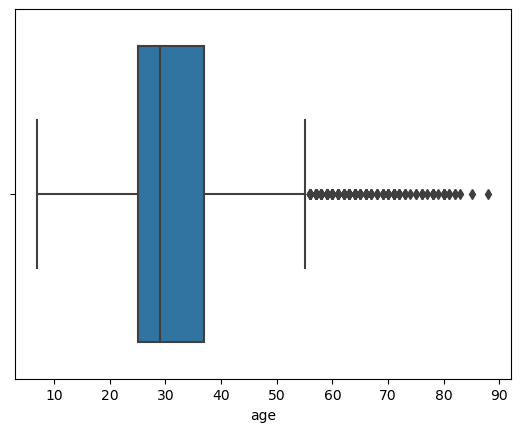

In [21]:
sns.boxplot(data = train, x = 'age', orient= 'h')

<AxesSubplot:xlabel='age', ylabel='Count'>

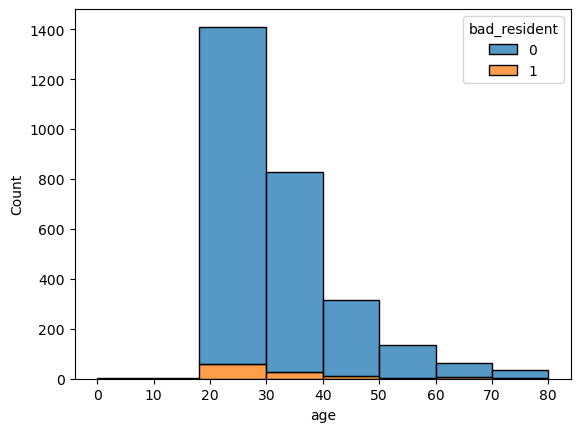

In [28]:
bins = [0, 18, 30, 40, 50, 60, 70, 80]
sns.histplot(data=train, x="age", bins=bins, hue="bad_resident", multiple="stack")

In [62]:
def histplot_n(data, col):
    
    binss = [10, 15, 20, 25, 30, 35, 40 , 45, 50, 55, 60, 65, 70, 75, 80]
    
    sns.histplot(data= data, x= col, bins= binss, hue= "bad_resident", multiple="stack")
    
    plt.title(f'{col.capitalize()} Causing The Most Damage')
    plt.xlabel(f'{col.capitalize()}')
    
    plt.legend(labels= ['Bad Resident','Good resident'])
    
    return plt.show()
    

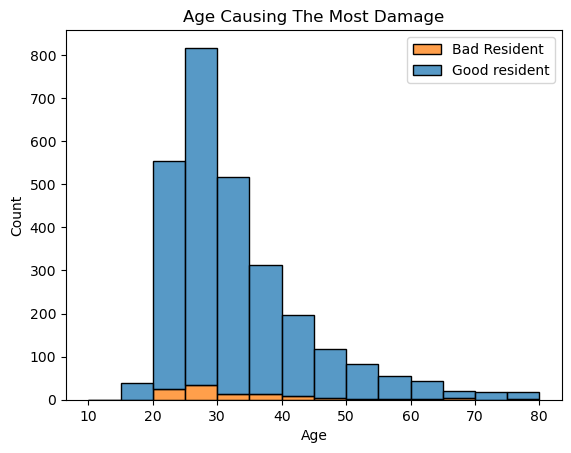

In [63]:
histplot_n(train, 'age')

In [85]:
def histplot_br(col):
    
    binss = [18, 20, 25, 30, 35, 40 , 45, 50, 55, 60, 65, 70, 75, 80]
    
    bad_resid = train[(train.bad_resident == 1)]
    
    sns.histplot(data= bad_resid, x= col, bins=binss, color = 'seagreen') 
    
    plt.title(f'{col.capitalize()} Causing The Most Damage')
    plt.xlabel(f'{col.capitalize()}')
    
    return plt.show()

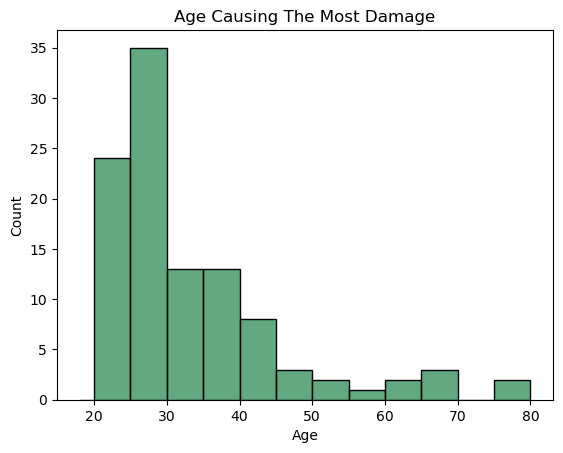

In [86]:
histplot_br('age')

<AxesSubplot:xlabel='age', ylabel='Count'>

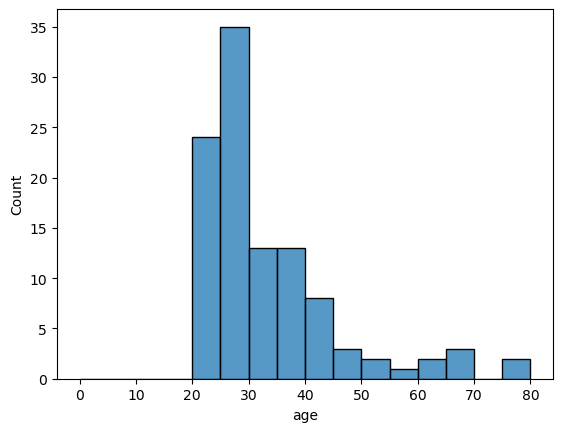

In [71]:
binss = [0, 5, 10, 15, 20, 25, 30, 35, 40 , 45, 50, 55, 60, 65, 70, 75, 80]
sns.histplot(data=bad_resid, x="age", bins=binss) #, hue="bad_resident", multiple="stack")

In [30]:
age_bin = pd.cut(train.age, bins= binss)

$H_0$: Age is not dependent on damage

$H_a$: Age is dependent on damage

In [113]:
def chi_test(train, col = False, bins = False):
    '''get result of chi-square test'''
    
    if bins:
    
        binss = [0, 5, 10, 15, 20, 25, 30, 35, 40 , 45, 50, 55, 60, 65, 70, 75, 80]
        age_bin = pd.cut(train.age, bins= binss)
        
        observed = pd.crosstab(age_bin, train.bad_resident)
        chi2, p, degf, expected = stats.chi2_contingency(observed)
    else:
        
        observed = pd.crosstab(train[col], train.bad_resident)
        chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    𝜶 = .05

    if p < 𝜶:
        print("We reject the null hypothesis.")
    else:
        print("We fail to reject the null hypothesis.")
    
    return print(f'''
Chi2 = {chi2:.3f}
P-value = {p:.3f}''')


In [114]:
chi_test(train, col = 'term' )

We fail to reject the null hypothesis.

Chi2 = 24.848
P-value = 0.129


In [31]:
chi2,p = e.chi_test(age_bin, train)
    
print(f'chi² = {chi2:.3f}')
print(f'p = {p:.3}')    

chi² = 17.909
p = 0.161


In [32]:
𝜶 = .05

if p < 𝜶:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We fail to reject the null hypothesis.


In [33]:
observed = pd.crosstab(train.bad_resident, age_bin)

In [34]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

(17.90873261637582, 0.16101568116307993)

### Are shorter term rentors causing more damage?

In [35]:
train['term'].value_counts().sort_index()

1        8
2        5
3       11
4       16
5       20
6       73
7       21
8       25
9       20
10      22
11      58
12    1082
13     555
14     320
15     388
16      43
17      21
18     110
25       1
Name: term, dtype: int64

<AxesSubplot:xlabel='term'>

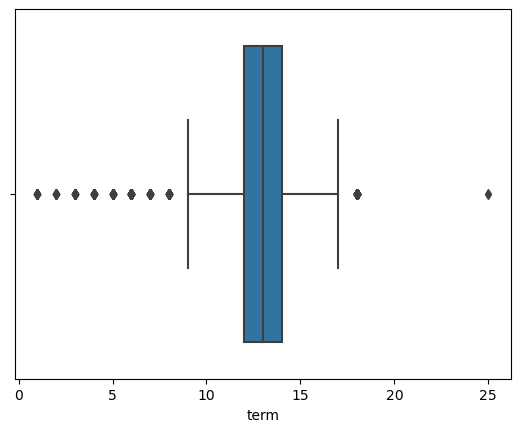

In [38]:
term_len_count = train['term'].value_counts().sort_index()

sns.boxplot(data = train, x = 'term', orient= 'h')

In [39]:
train.term.describe()

count    2799.000000
mean       12.714184
std         2.499703
min         1.000000
25%        12.000000
50%        13.000000
75%        14.000000
max        25.000000
Name: term, dtype: float64

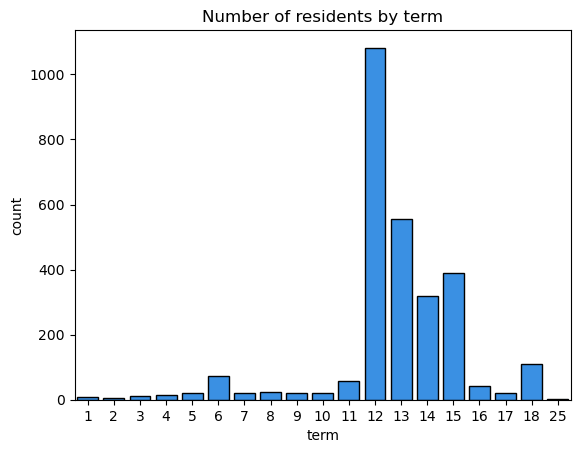

In [40]:
sns.countplot(train.term,color = 'dodgerblue', ec = 'black' )
plt.title("Number of residents by term")
plt.show()

<AxesSubplot:xlabel='term', ylabel='count'>

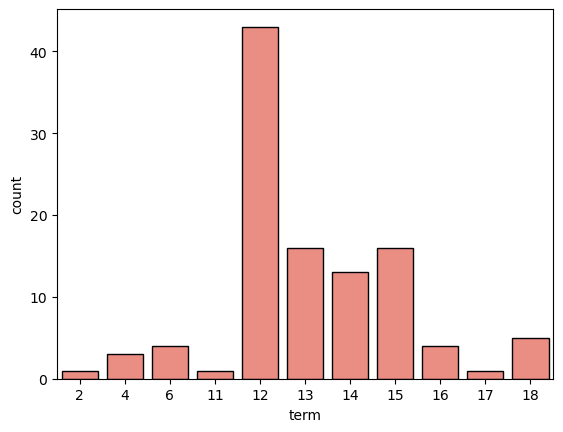

In [41]:
bad_resid = train[(train.bad_resident == 1)]

sns.countplot(x = 'term', data = bad_resid, color = '#fb8072', ec = 'black')

$H_0$: Term lease is not dependent on damage

$H_a$: Term lease is dependent on damage

In [42]:
chi2, p = e.chi_test(train['term'], train)

print(f'chi² = {chi2:.3f}')
print(f'p = {p:.3}')    

chi² = 24.848
p = 0.129


In [43]:
𝜶 = .05

if p < 𝜶:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We fail to reject the null hypothesis.


In [115]:
def countplot(data, column, color, bad = False):
    
    
    if bad: 
        bad_resid = data[(data.bad_resident == 1)]
        sns.countplot(x = column, data = bad_resid, color = color, ec = 'black')
        plt.title(f'NUMBER OF RESIDENTS BY {column.upper()}')
        plt.xlabel(f'{column.capitalize()}')
        plt.ylabel('Count')
        plt.show()
    
    else:
        
        sns.countplot(x = column, data = data, color = color, ec = 'black')
        plt.title(f'NUMBER OF RESIDENTS BY {column.upper()}')
        plt.xlabel(f'{column.capitalize()}')
        plt.ylabel('Count')
        plt.show()
        
        

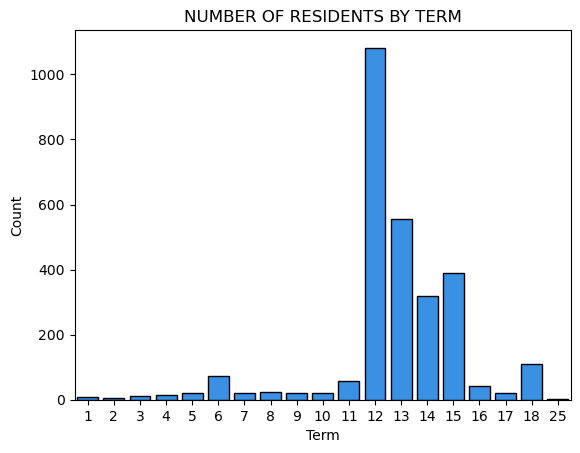

In [116]:
countplot(train, 'term', 'dodgerblue')

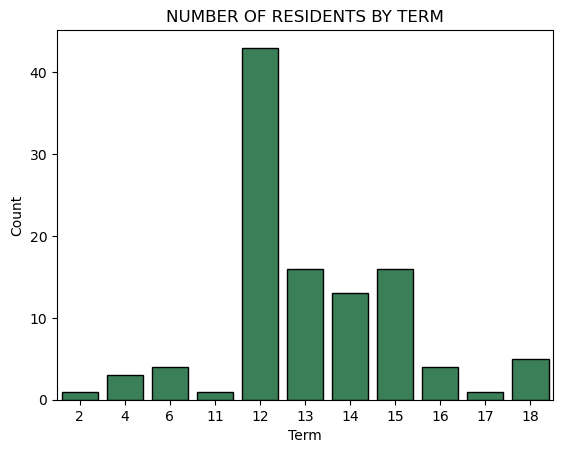

In [117]:
countplot(train, 'term', 'seagreen', bad = True)